# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
Totally 17 campaigns has been conducted with 79354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

# prepare data
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# model
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import time
from sklearn.metrics import precision_recall_fscore_support

set_config(display="diagram")

import warnings
warnings.filterwarnings("ignore")

print("All modules loaded")

All modules loaded


In [4]:
#df = pd.read_csv('data/bankbank-additional-full.csv', sep = ';')
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.count()

,0
age,41188
job,41188
marital,41188
education,41188
default,41188
housing,41188
loan,41188
contact,41188
month,41188
day_of_week,41188


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



**Checking if there is any nulls in the data**

In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df['y'].describe()

,y
count,41188
unique,2
top,no
freq,36548


In [ ]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Business Objective :**
The business goal is to find a model that can explain success of a contact. Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

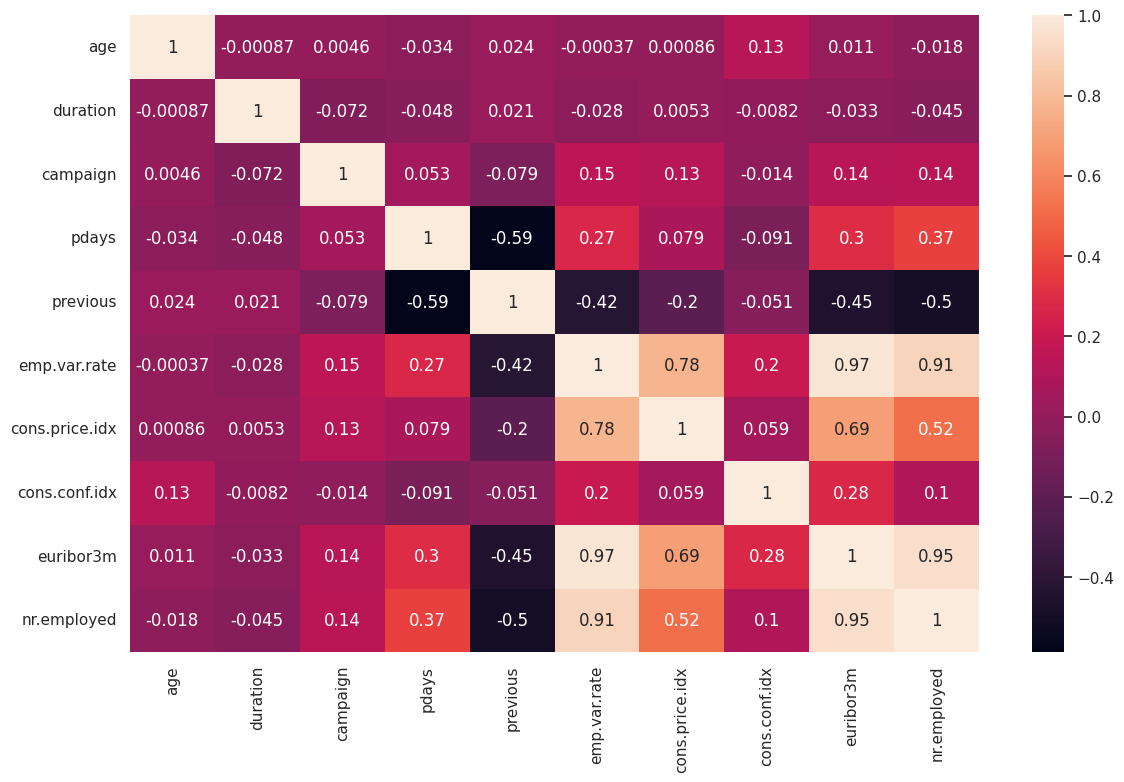

In [23]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True);

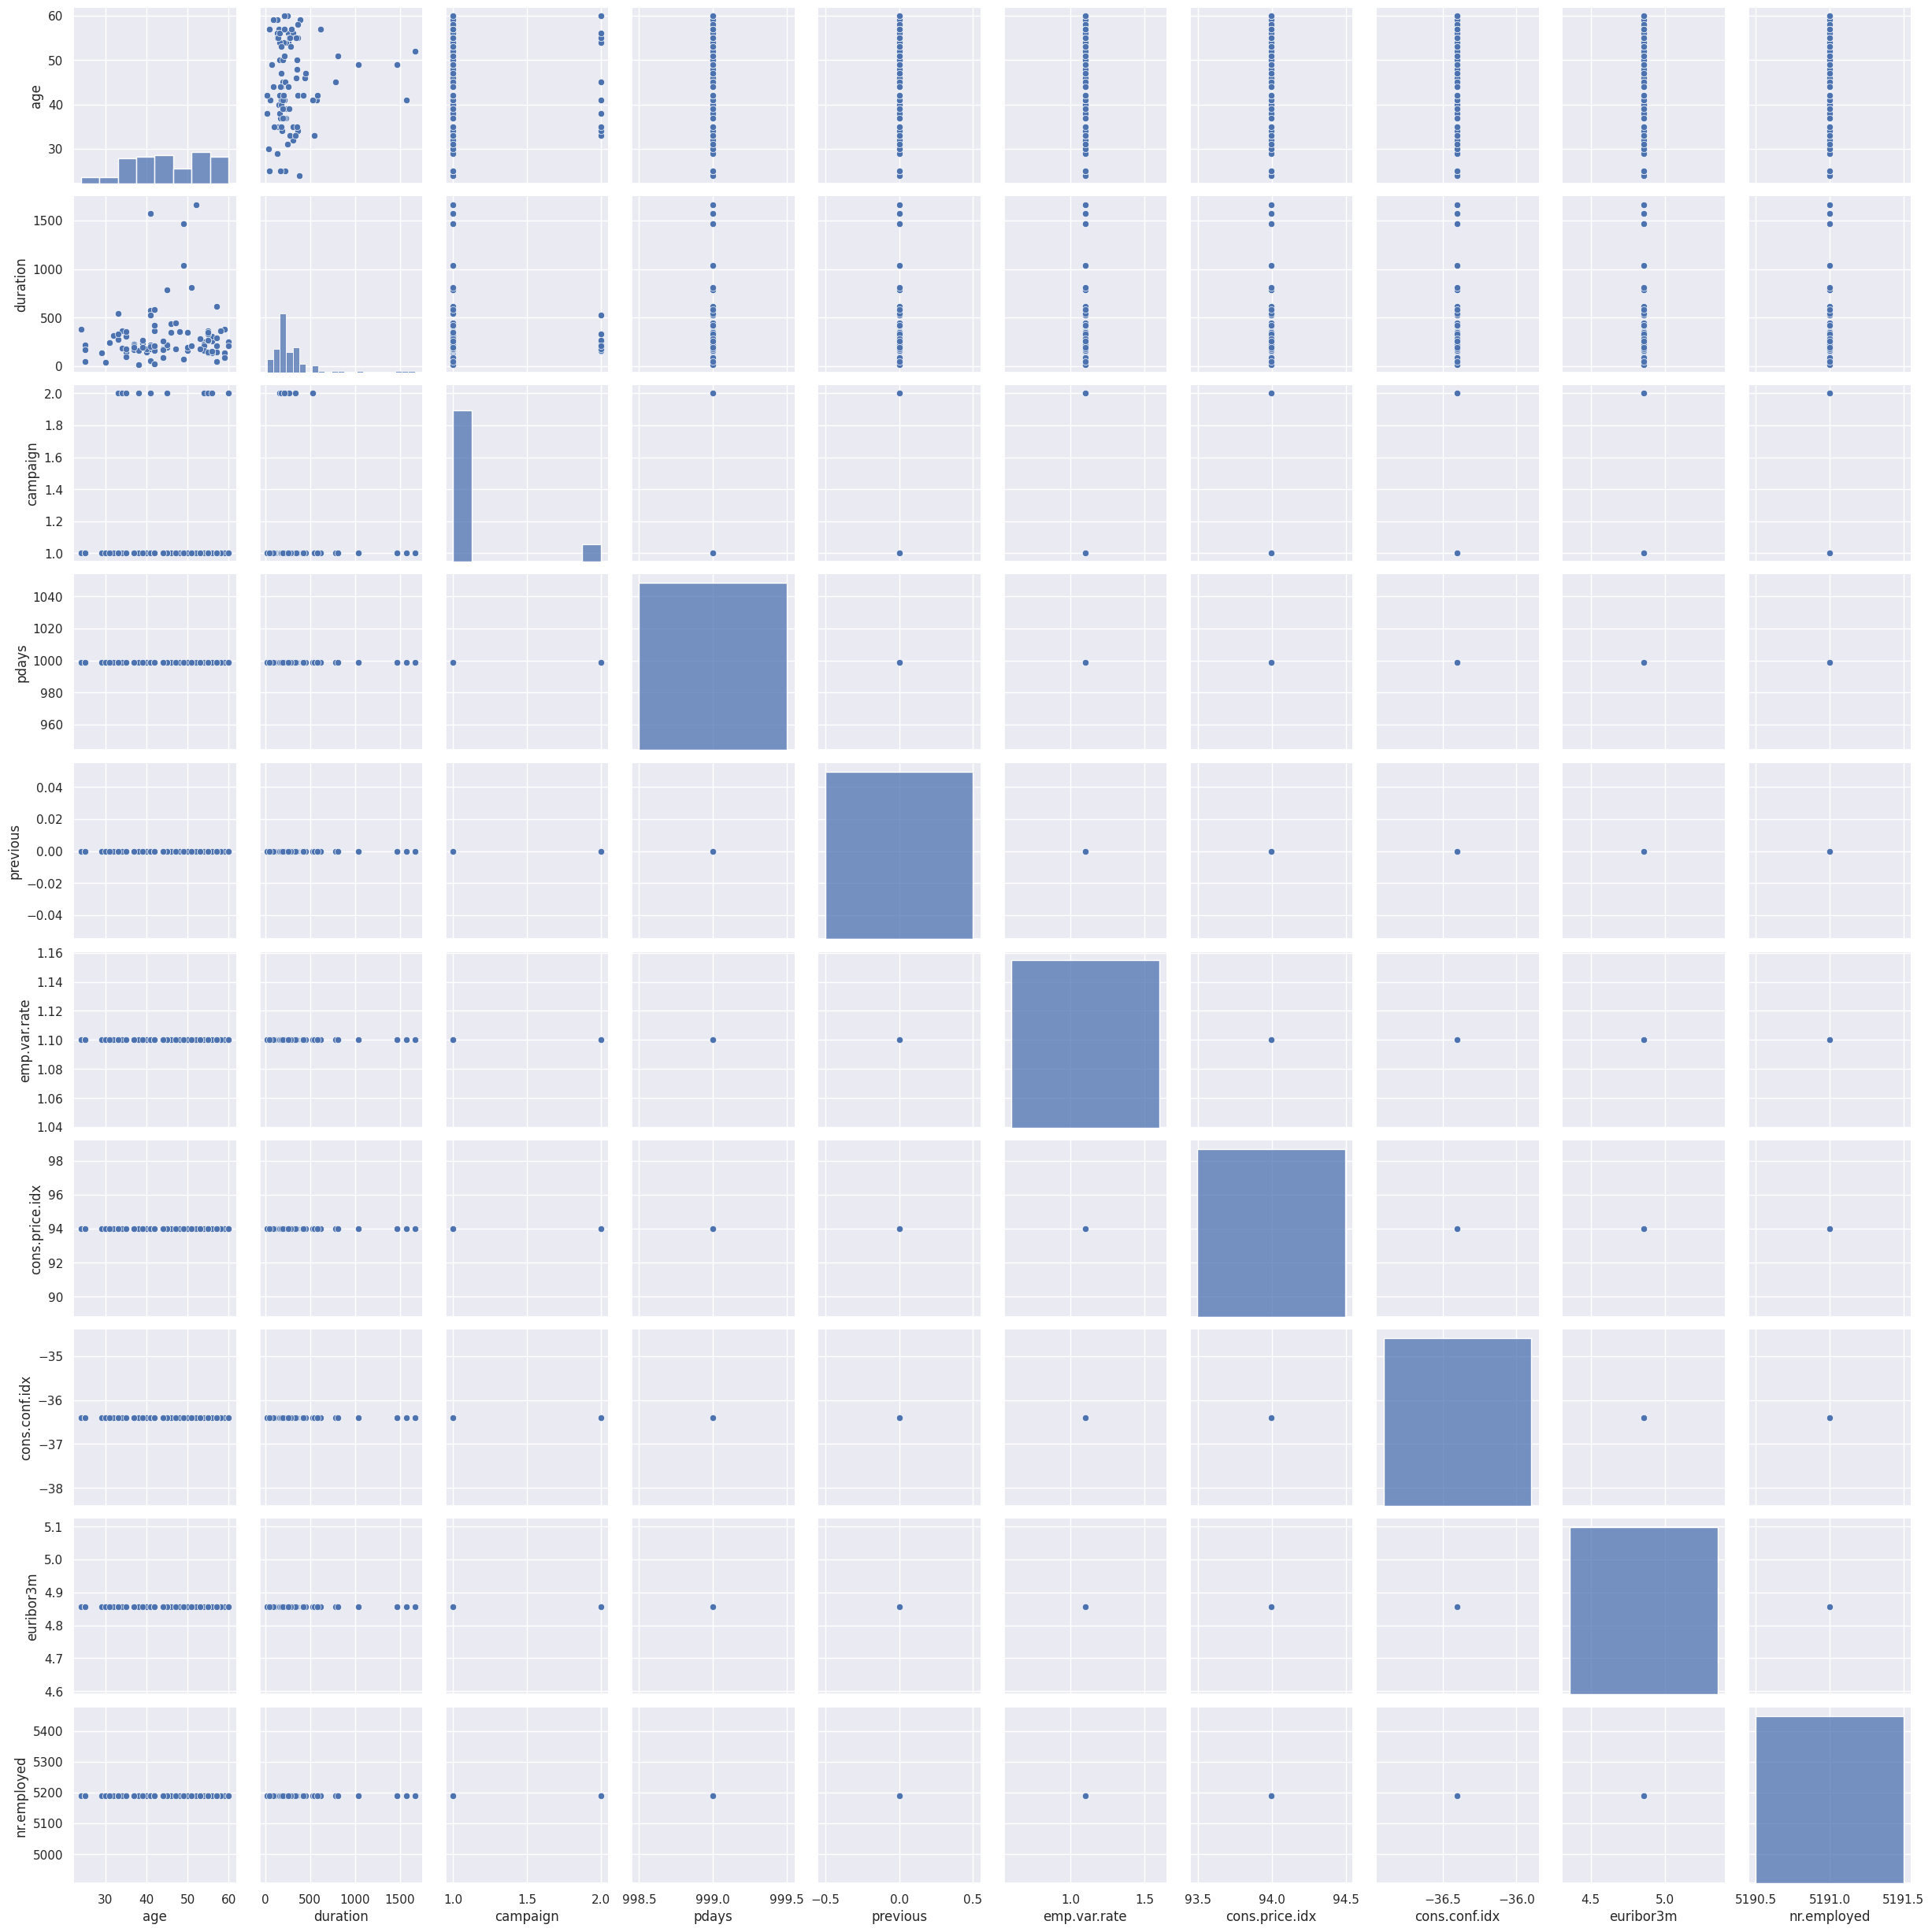

In [24]:
sns.pairplot(df[0:100]);

**OneHotEncoding the categorial data**

In [6]:
# Instantiate OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = df.drop(columns=['y']).select_dtypes(['object']).columns.to_list()
# Fit and transform the selected columns
encoded_features = encoder.fit_transform(df[categorical_cols])
# Get feature names for the new columns
feature_names = encoder.get_feature_names_out(categorical_cols)
# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)
# Concatenate with the original DataFrame (dropping original categorical columns)
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)


In [7]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  float64
 12  job_blue-collar                41188 non-null 

In [8]:

X = df_encoded.drop('y', axis = 1)
y = df_encoded['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

(28831, 63)
(12357, 63)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [10]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_baseline = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy (Dummy Classifier): {baseline_accuracy}")

Baseline Accuracy (Dummy Classifier): 0.8844379703811605


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [11]:
# Use default parameters or minimal tuning
log_reg_baseline = LogisticRegression(random_state=42)
log_reg_baseline.fit(X_train, y_train)
y_pred_log_reg_baseline = log_reg_baseline.predict(X_test)


### Problem 9: Score the Model

What is the accuracy of your model?

In [12]:
log_reg_baseline_accuracy = accuracy_score(y_test, y_pred_log_reg_baseline)
print(f"Baseline Accuracy (Simple Logistic Regression): {log_reg_baseline_accuracy}")

Baseline Accuracy (Simple Logistic Regression): 0.9085538561139435


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### **Running the model with the default settings**

In [ ]:

models = {
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [ 1]}),
    'decisiontree': (DecisionTreeClassifier(), {'decisiontree__max_depth': None}),
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [5]}),
    'svc': (SVC(), {'svc__C': [ 1], 'svc__kernel': [ 'rbf']}),

}

In [ ]:
results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        (name, model)
    ])
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=None, n_jobs=1)

     # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

     # Get the best estimator
    best_model = grid_search.best_estimator_

     # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)


    array = precision_recall_fscore_support(y_test, best_model.predict(X_test), average='weighted')

    # Append the results
    results.append([name, fit_time, train_score, test_score])

    # Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('model', inplace=True)

results_df

,Train Time,Train Accuracy,Test Accuracy
model,,,
logisticregression,130.815983,0.911449,0.909201
decisiontree,0.710142,0.888592,0.884438
knn,6.377673,0.931671,0.902080
svc,81.234771,0.898789,0.895201


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Finding the top 19 highest correlated features**                             We got 63 features after the one hot encoding, Trying to train with top 19 highest correlated features,

In [13]:
### BEGIN SOLUTION

mapping = { 'no': 0, 'yes': 1}

df_encoded['y_encoded'] = df_encoded['y'].map(mapping)
print(df_encoded['y_encoded'].value_counts())


df_encoded_corr =df_encoded.drop(['y'], axis=1)
df_encoded_corr.info()
highest_corr = df_encoded_corr.corr()[['y_encoded']].nlargest(columns = 'y_encoded', n = 20)
### END SOLUTION

# Answer check
print(highest_corr.index)
print(type(highest_corr))

y_encoded
0    36548
1     4640
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  float64
 11  job_blue-collar                41188 non-null  f

**Training the model with top 19 highest correlated features and just 5000 rows taking 25 minutes to train. So tried to split the dataset and train them with the small chunk of 5000 records. There are 8 chunks has been created **

In [ ]:
X1 = df_encoded[['duration', 'poutcome_success', 'previous',
       'contact_cellular', 'month_mar', 'month_oct', 'month_sep', 'default_no',
       'job_student', 'job_retired', 'month_dec', 'month_apr', 'cons.conf.idx',
       'marital_single', 'education_university.degree', 'poutcome_failure',
       'job_admin.', 'age', 'education_unknown']].head(5000)
y1 = df_encoded['y'].head(5000)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

(3500, 19)
(1500, 19)


In [ ]:

# Define models and their hyperparameters
models = {
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'decisiontree': (DecisionTreeClassifier(), {'decisiontree__max_depth': [2, 4, 6]}),
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [2, 4, 6]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 3], 'svc__kernel': ['linear', 'rbf']}),

}

In [ ]:
results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        (name, model)
    ])
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=None, n_jobs=1)

     # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

     # Get the best estimator
    best_model = grid_search.best_estimator_

     # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)


    array = precision_recall_fscore_support(y_test, best_model.predict(X_test), average='weighted')

    # Append the results
    results.append([name, fit_time, train_score, test_score])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('model', inplace=True)

results_df

,Train Time,Train Accuracy,Test Accuracy
model,,,
logisticregression,0.337608,0.972286,0.971333
decisiontree,0.060428,0.973143,0.966000
knn,0.095780,0.978857,0.965333
svc,243.784969,0.973143,0.966000


**Creating a common training model for training each of the chunks**

In [ ]:
def model_trianing(X_train, X_test, y_train, y_test):
  results = []

  for name, (model, params) in models.items():
      # Create a pipeline
      pipeline = Pipeline([
          (name, model)
      ])
      # Perform grid search
      grid_search = GridSearchCV(pipeline, param_grid=params, cv=None, n_jobs=1)

      # Fit the model and time it
      start_time = time.time()
      grid_search.fit(X_train, y_train)
      fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

      # Get the best estimator
      best_model = grid_search.best_estimator_

      # Evaluate on training and test sets
      train_score = best_model.score(X_train, y_train)
      test_score = best_model.score(X_test, y_test)


      array = precision_recall_fscore_support(y_test, best_model.predict(X_test), average='weighted')

      # Append the results
      results.append([name, fit_time, train_score, test_score])

  # Create the results DataFrame
  results_df = pd.DataFrame(results, columns=['model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
  results_df.set_index('model', inplace=True)
  results_df
  return results_df

In [ ]:
X2 = df_encoded[['duration', 'poutcome_success', 'previous',
       'contact_cellular', 'month_mar', 'month_oct', 'month_sep', 'default_no',
       'job_student', 'job_retired', 'month_dec', 'month_apr', 'cons.conf.idx',
       'marital_single', 'education_university.degree', 'poutcome_failure',
       'job_admin.', 'age', 'education_unknown']].iloc[5001:10000]
y2 = df_encoded['y'].iloc[5001:10000]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

print("5001 to 10000")
print(model_trianing(X_train, X_test, y_train, y_test))

(3499, 19)
(1500, 19)
5001 to 10000
                    Train Time  Train Accuracy  Test Accuracy
model                                                        
logisticregression    2.402022        0.966562       0.959333
decisiontree          0.061069        0.966562       0.960000
knn                   0.095754        0.971420       0.957333
svc                 161.794637        0.965419       0.957333


In [ ]:
X3 = df_encoded[['duration', 'poutcome_success', 'previous',
       'contact_cellular', 'month_mar', 'month_oct', 'month_sep', 'default_no',
       'job_student', 'job_retired', 'month_dec', 'month_apr', 'cons.conf.idx',
       'marital_single', 'education_university.degree', 'poutcome_failure',
       'job_admin.', 'age', 'education_unknown']].iloc[10001:15000]
y3 = df_encoded['y'].iloc[10001:15000]

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

print("10001 to 15000")
print(model_trianing(X_train, X_test, y_train, y_test))

(3499, 19)
(1500, 19)
10001 to 15000
                    Train Time  Train Accuracy  Test Accuracy
model                                                        
logisticregression    0.394190        0.953129       0.953333
decisiontree          0.062712        0.958274       0.950000
knn                   0.104896        0.958560       0.953333
svc                 102.880810        0.952844       0.952667


In [ ]:
X4 = df_encoded[['duration', 'poutcome_success', 'previous',
       'contact_cellular', 'month_mar', 'month_oct', 'month_sep', 'default_no',
       'job_student', 'job_retired', 'month_dec', 'month_apr', 'cons.conf.idx',
       'marital_single', 'education_university.degree', 'poutcome_failure',
       'job_admin.', 'age', 'education_unknown']].iloc[15001:20000]
y4 = df_encoded['y'].iloc[15001:20000]

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

print("15001:20000")
print(model_trianing(X_train, X_test, y_train, y_test))

(3499, 19)
(1500, 19)
15001:20000
                    Train Time  Train Accuracy  Test Accuracy
model                                                        
logisticregression    1.168521        0.946556       0.951333
decisiontree          0.068186        0.948271       0.949333
knn                   0.096845        0.951415       0.946667
svc                 172.808616        0.948557       0.947333


In [ ]:
X5 = df_encoded[['duration', 'poutcome_success', 'previous',
       'contact_cellular', 'month_mar', 'month_oct', 'month_sep', 'default_no',
       'job_student', 'job_retired', 'month_dec', 'month_apr', 'cons.conf.idx',
       'marital_single', 'education_university.degree', 'poutcome_failure',
       'job_admin.', 'age', 'education_unknown']].iloc[20001:25000]
y5 = df_encoded['y'].iloc[20001:25000]

X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

print("20001:25000")
print(model_trianing(X_train, X_test, y_train, y_test))

(3499, 19)
(1500, 19)
20001:25000
                    Train Time  Train Accuracy  Test Accuracy
model                                                        
logisticregression    1.602409        0.949700       0.958667
decisiontree          0.064337        0.958560       0.956000
knn                   0.101479        0.955702       0.943333
svc                 370.485724        0.952558       0.960667


In [ ]:
X6 = df_encoded[['duration', 'poutcome_success', 'previous',
       'contact_cellular', 'month_mar', 'month_oct', 'month_sep', 'default_no',
       'job_student', 'job_retired', 'month_dec', 'month_apr', 'cons.conf.idx',
       'marital_single', 'education_university.degree', 'poutcome_failure',
       'job_admin.', 'age', 'education_unknown']].iloc[25001:30000]
y6 = df_encoded['y'].iloc[25001:30000]

X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

print("25001:30000")
print(model_trianing(X_train, X_test, y_train, y_test))

(3499, 19)
(1500, 19)
25001:30000
                    Train Time  Train Accuracy  Test Accuracy
model                                                        
logisticregression    2.055371        0.908260       0.902000
decisiontree          0.066911        0.918548       0.903333
knn                   0.096789        0.913404       0.888667
svc                 299.207875        0.902544       0.895333


In [ ]:
X7 = df_encoded[['duration', 'poutcome_success', 'previous',
       'contact_cellular', 'month_mar', 'month_oct', 'month_sep', 'default_no',
       'job_student', 'job_retired', 'month_dec', 'month_apr', 'cons.conf.idx',
       'marital_single', 'education_university.degree', 'poutcome_failure',
       'job_admin.', 'age', 'education_unknown']].iloc[30001:35000]
y7 = df_encoded['y'].iloc[30001:35000]

X_train, X_test, y_train, y_test = train_test_split(X7, y7, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

print("30001:35000")
print(model_trianing(X_train, X_test, y_train, y_test))

(3499, 19)
(1500, 19)
30001:35000
                    Train Time  Train Accuracy  Test Accuracy
model                                                        
logisticregression    1.527724        0.921406       0.916000
decisiontree          0.069507        0.927408       0.898667
knn                   0.103173        0.923978       0.899333
svc                 201.618637        0.924264       0.915333


In [ ]:
X8 = df_encoded[['duration', 'poutcome_success', 'previous',
       'contact_cellular', 'month_mar', 'month_oct', 'month_sep', 'default_no',
       'job_student', 'job_retired', 'month_dec', 'month_apr', 'cons.conf.idx',
       'marital_single', 'education_university.degree', 'poutcome_failure',
       'job_admin.', 'age', 'education_unknown']].iloc[35001:]
y8 = df_encoded['y'].iloc[35001:]

X_train, X_test, y_train, y_test = train_test_split(X8, y8, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

print("35001:")
print(model_trianing(X_train, X_test, y_train, y_test))

(4330, 19)
(1857, 19)
35001:
                    Train Time  Train Accuracy  Test Accuracy
model                                                        
logisticregression    2.884414        0.731178       0.728595
decisiontree          0.075742        0.746882       0.739365
knn                   0.129176        0.773903       0.673129
svc                 367.492454        0.716166       0.696823


# Collecting the training metrics of each chunks and creating a dataframe with mean value of each model

In [18]:
data=[["logisticregression",0.337608,0.972286,0.971333],
["decisiontree",0.060428,0.973143,0.966000],
["knn",0.095780,0.978857,0.965333],
["svc",243.784969,0.973143,0.966000],
["logisticregression",2.402022,0.966562,0.959333],
["decisiontree",0.061069,0.966562,0.960000],
["knn",0.095754,0.971420,0.957333],
["svc",161.794637,0.965419,0.957333],
["logisticregression",0.394190,0.953129,0.953333],
["decisiontree",0.062712,0.958274,0.950000],
["knn",0.104896,0.958560,0.953333],
["svc",102.880810,0.952844,0.952667],
["logisticregression",1.168521,0.946556,0.951333],
["decisiontree",0.068186,0.948271,0.949333],
["knn",0.096845,0.951415,0.946667],
["svc",172.808616,0.948557,0.947333],
["logisticregression",1.602409,0.949700,0.958667],
["decisiontree",0.064337,0.958560,0.956000],
["knn",0.101479,0.955702,0.943333],
["svc",370.485724,0.952558,0.960667],
["logisticregression",2.055371,0.908260,0.902000],
["decisiontree",0.066911,0.918548,0.903333],
["knn",0.096789,0.913404,0.888667],
["svc",299.207875,0.902544,0.895333],
["logisticregression",1.527724,0.921406,0.916000],
["decisiontree",0.069507,0.927408,0.898667],
["knn",0.103173,0.923978,0.899333],
["svc",201.618637,0.924264,0.915333],
["logisticregression",2.884414,0.731178,0.728595],
["decisiontree",0.075742,0.746882,0.739365],
["knn",0.129176,0.773903,0.673129],
["svc",367.492454,0.716166,0.696823]   ]

all_metrics_df = pd.DataFrame(data, columns=['model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
all_metrics_df.set_index('model', inplace=True)

mean_df = all_metrics_df.groupby('model').mean()
mean_df

,Train Time,Train Accuracy,Test Accuracy
model,,,
decisiontree,0.066112,0.924706,0.915337
knn,0.102987,0.928405,0.903391
logisticregression,1.546532,0.918635,0.917574
svc,240.009215,0.916937,0.911436


**##### Obeservations:**

For comparing the logisticRegression with DecisionTree, KNN and SVC, we have 41000 records for this training, we have used couple of hyperparameters, C value for LogisticRegression, various max depth value for DecisionTrees, various n values for KNearestNeighbours, SVC with various C and Kernel values.

Time Taken :   Training time for decisiontree was better, may be because i have used the max depth of 6, all the SVC took so long to train compare to LogisticRegression and KNN.

Accuracy Score : Training Accuracy and Testing Accuracy are mostly very similar. DecisionTree and KNN are performing better for those top 19 features and hyper parameters

**Following Features are highly impacting the output target variables:**

Last Contact duration, Previous Contanct successful/failure outcome, number of contacts before this, Cellular Communication, Contact during March, April, October, September, December, no default in credit, job might be admin, retired or student, marital status is single, Grauduated for university degree, Increase in the Consumer Price Index and Age
  